# Surprise Housing - Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

#### Data Dictionary - https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#used to convert month number to name
import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV



In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_rows', 250)

#to reset display settings
#pd.reset_option('display.max_rows')

In [4]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. Data Cleaning

#### Missing data

In [6]:
#checking for columns with null values and their percentage
nulls = round(data.isnull().sum()/data.shape[0],2)*100 
nulls[nulls>0].sort_values(ascending=False)

PoolQC          100.0
MiscFeature      96.0
Alley            94.0
Fence            81.0
FireplaceQu      47.0
LotFrontage      18.0
GarageYrBlt       6.0
GarageType        6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
BsmtFinType1      3.0
BsmtExposure      3.0
BsmtCond          3.0
BsmtQual          3.0
BsmtFinType2      3.0
MasVnrArea        1.0
MasVnrType        1.0
dtype: float64

In [7]:
#dropping columns with more than 45% missing data
missing_thresh = 45
col_drop = nulls[nulls>missing_thresh].index

col_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
data = data.drop(labels=col_drop,axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
nulls = nulls[(nulls<=missing_thresh) & (nulls > 0) ]
nulls

LotFrontage     18.0
MasVnrType       1.0
MasVnrArea       1.0
BsmtQual         3.0
BsmtCond         3.0
BsmtExposure     3.0
BsmtFinType1     3.0
BsmtFinType2     3.0
GarageType       6.0
GarageYrBlt      6.0
GarageFinish     6.0
GarageQual       6.0
GarageCond       6.0
dtype: float64

In [10]:
#handling missing values based on data dictionary

The missing values in columns related to Basement mean the property has no Garage. The missing values in this case can be replaced by a new category - "New Garage"

In [11]:
data[['GarageType','GarageFinish','GarageQual','GarageCond']] = data[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna("No Garage")

The missing values in columns related to Basement mean the property has no Basement. The missing values in this case can be replaced by a new category - "New Basement"

In [12]:
data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna("No Basement")

LotFrontage
Mode : 0    60.0
dtype: float64
Mean : 70.04995836802665
Median : 69.0


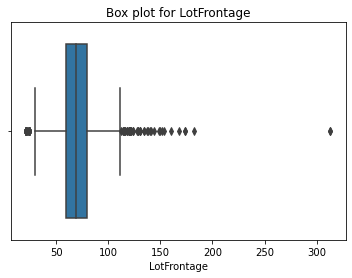

MasVnrArea
Mode : 0    0.0
dtype: float64
Mean : 103.68526170798899
Median : 0.0


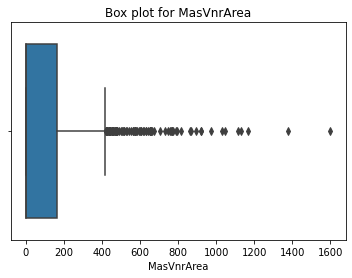

GarageYrBlt
Mode : 0    2005.0
dtype: float64
Mean : 1978.5061638868744
Median : 1980.0


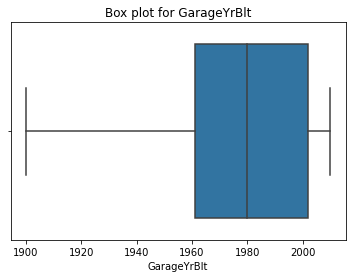

In [13]:
#analysing numerical with missing values
num_nulls = data[nulls.index].describe().columns
for i in num_nulls:
    print(i)
    print("Mode : " + str(data[i].mode()))
    print("Mean : " + str(data[i].mean()))
    print("Median : " + str(data[i].median()))
    
    plt.figure()
    plt.title("Box plot for " + i)
    sns.boxplot(data[i])
    plt.show()

In [14]:
#missing values in GarageYrBlt stands for No Garage. Imputing missing values with 0
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [15]:
#missing data in MasVnrArea - Masonry Veneer Area means the Masonry Veneer Type is none. We can replace it with 0. 
#This is also the mode of the column
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])

In [16]:
#imputing missing values with median where there are outliers
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())


In [17]:
#checking other categorical columns
data['MasVnrType'].value_counts( dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [18]:
#we can replace the missing values with most commonly occuring masonry veneer type - None
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])

In [19]:
#verify if there are any missing values left
nulls = round(data.isnull().sum()/data.shape[0],2)*100 
nulls[nulls>0]

Series([], dtype: float64)

In [20]:
#lets check for number of zeros in each column
zeros = round(data[data == 0].count(axis=0)/len(data.index),2) * 100
zeros[zeros > 0].sort_values(ascending=False)

PoolArea         100.0
3SsnPorch         98.0
LowQualFinSF      98.0
MiscVal           96.0
BsmtHalfBath      94.0
ScreenPorch       92.0
BsmtFinSF2        89.0
EnclosedPorch     86.0
HalfBath          63.0
MasVnrArea        60.0
BsmtFullBath      59.0
2ndFlrSF          57.0
WoodDeckSF        52.0
Fireplaces        47.0
OpenPorchSF       45.0
BsmtFinSF1        32.0
BsmtUnfSF          8.0
GarageYrBlt        6.0
GarageCars         6.0
GarageArea         6.0
TotalBsmtSF        3.0
FullBath           1.0
dtype: float64

In [21]:
#columns with more than 98% zeros wouldn't add much information to our analysis and prediction. We can drop these columns
data = data.drop(['PoolArea','3SsnPorch','LowQualFinSF'],axis=1)

In [22]:
#check if Id column is unique
data['Id'].is_unique

True

In [23]:
#the ID column has unique values and adds no info to the analysis. We can drop this column
data = data.drop('Id',axis=1)

In [24]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,12,2008,WD,Normal,250000


In [25]:
#MSSubclass identifies the type of dwelling and is a categorical column as seen in the data dictionary
subclass = {
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

#map the values from the built dictionary
data['MSSubClass'] = data['MSSubClass'].map(subclass)
data['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [26]:
#converting months to categorical variable
data['Month_Sold'] = data['MoSold'].apply(lambda x : calendar.month_abbr[x])

#### Derived variables

In [27]:
#creating columns with age using year built,remodeled etc and year sold
data['Age']        =  data['YrSold'] - data['YearBuilt']
data['RemodAge']   =  data['YrSold'] - data['YearRemodAdd']
data['Garage_Age'] = data['YrSold'] - data['GarageYrBlt'] 

data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],inplace=True,axis=1)

### Outlier Analysis

Lets look at the spread of the data to identify outliers and skewed distribution

In [28]:
num_vars = data.select_dtypes(exclude='object').columns
num_vars

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice', 'Age',
       'RemodAge', 'Garage_Age'],
      dtype='object')

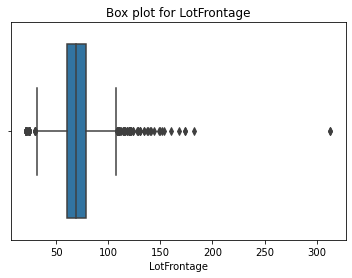

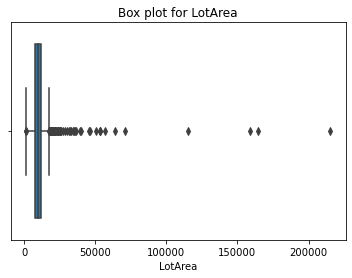

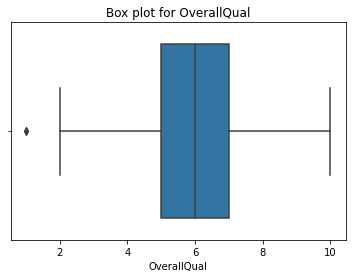

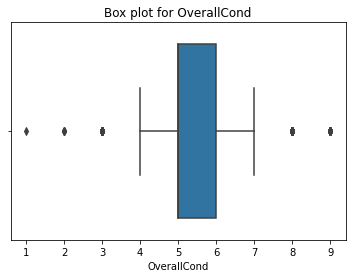

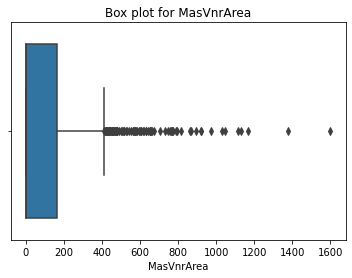

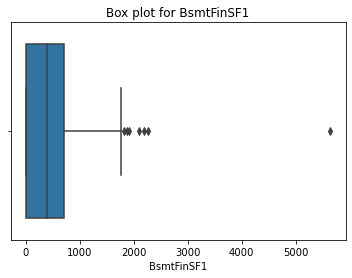

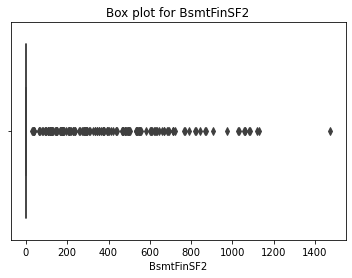

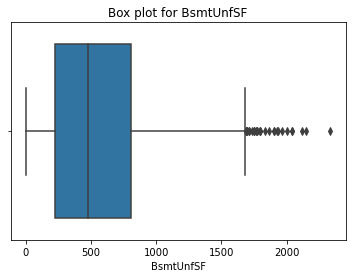

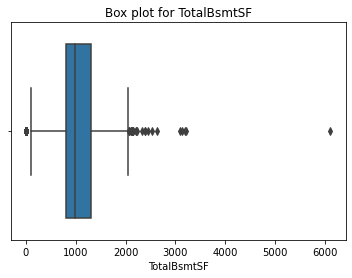

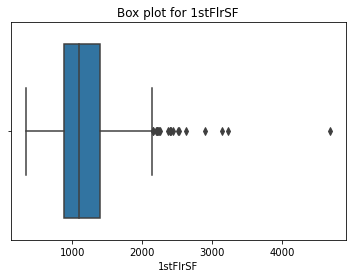

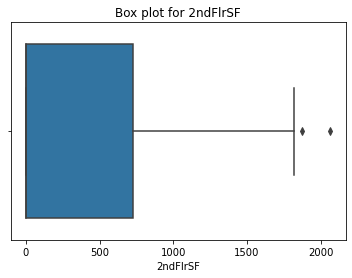

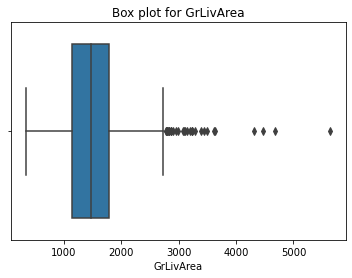

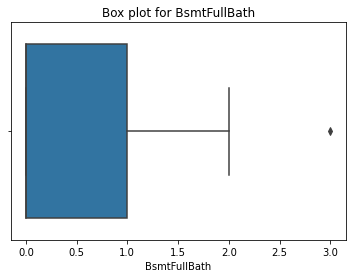

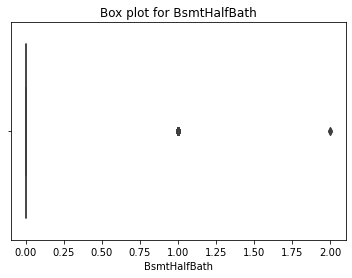

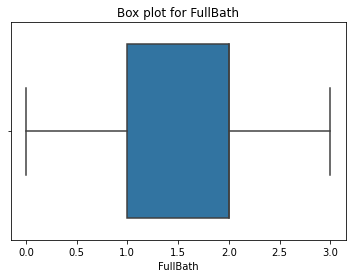

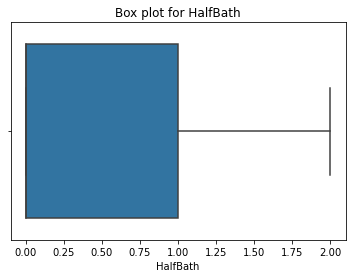

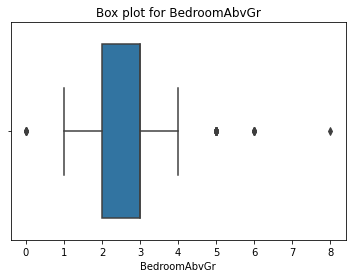

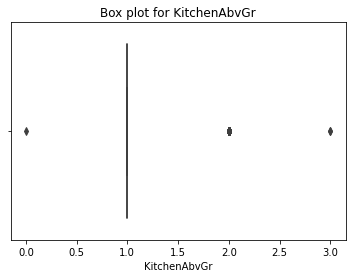

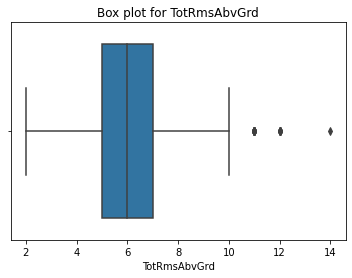

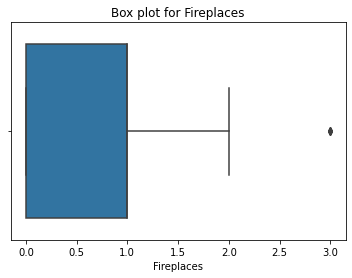

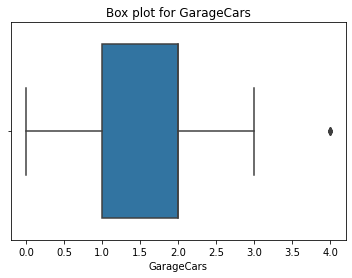

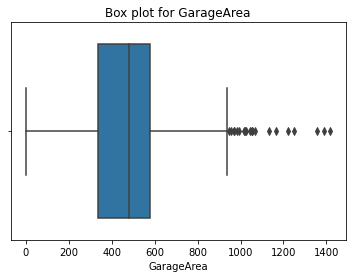

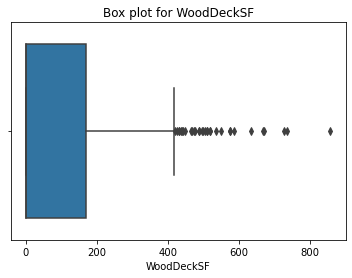

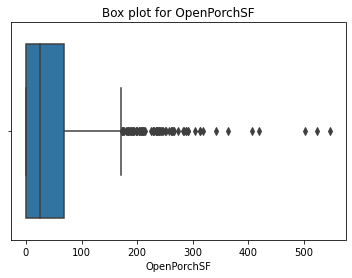

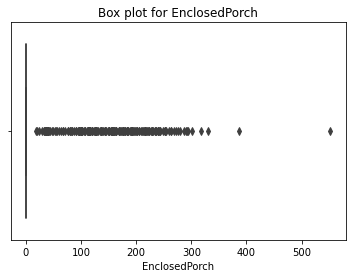

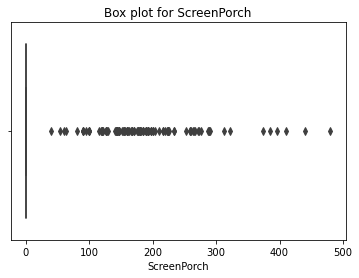

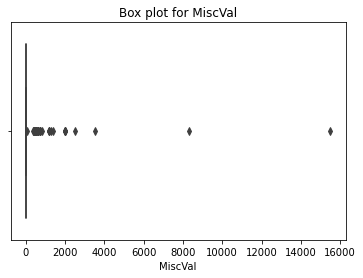

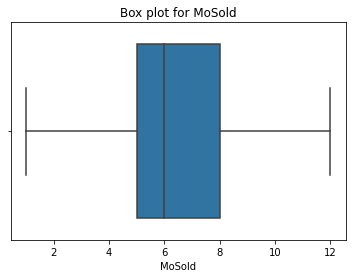

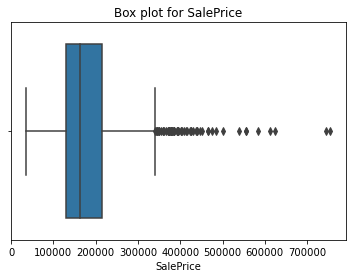

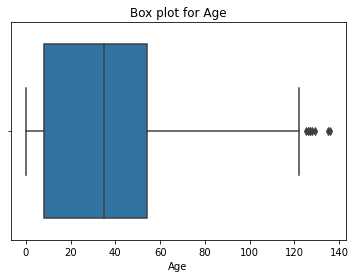

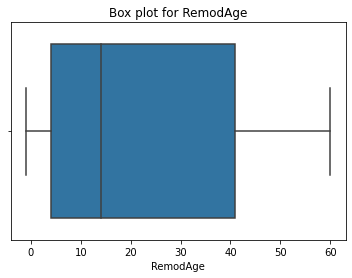

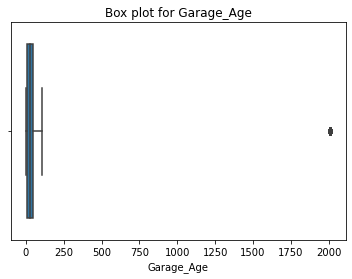

In [29]:
for i in num_vars:
    #plt.figure(figsize=[12,4])
    sns.boxplot(data[i])
    plt.title("Box plot for " + i)
    plt.show()


In [30]:
#Removing outliers
def remove_outlier(df,col,cvalue=0.95,fvalue=0.05):
    Q3 = df[col].quantile(cvalue)
    Q1 = df[col].quantile(fvalue)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 2.5*IQR)) & (df[col] <= (Q3 + 2.5*IQR))]
    

for i in num_vars:
    remove_outlier(data,i)

## 2. Data Visualization

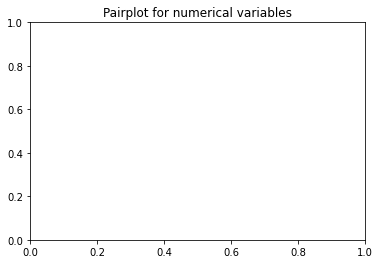

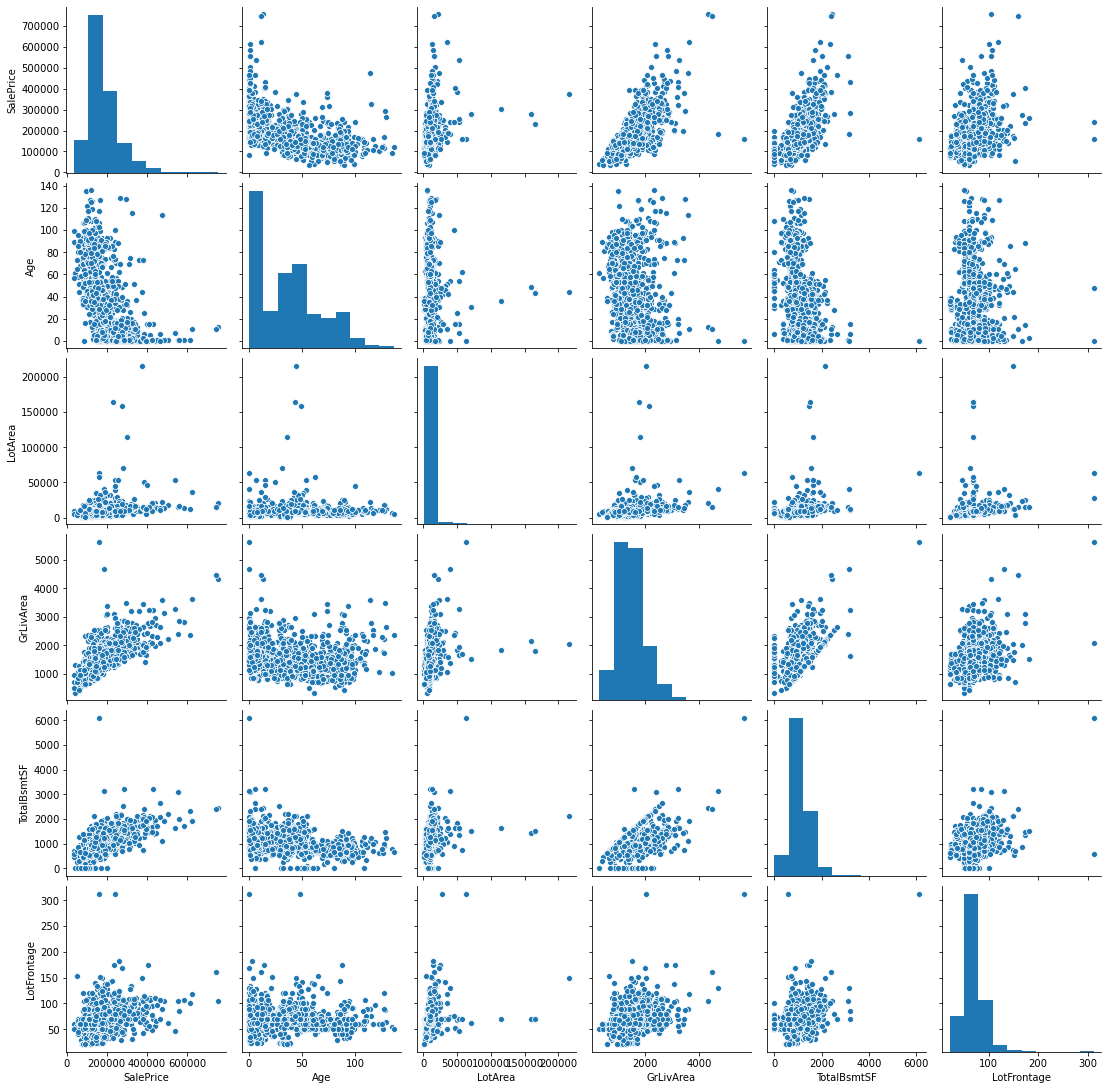

In [31]:
#Lets select a few numerical variables that could impact the sale price and visualize their relationship, mainly with SalePrice
vars = ['SalePrice','Age','LotArea','GrLivArea','TotalBsmtSF','LotFrontage']
plt.title("Pairplot for numerical variables")
sns.pairplot(data[vars]);

<b> Inferences</b>

- We see there is a significant linear relationship between GrLivArea and SalePrice
- There is also a linear relationship between TotalBsmtSF and SalePrice.

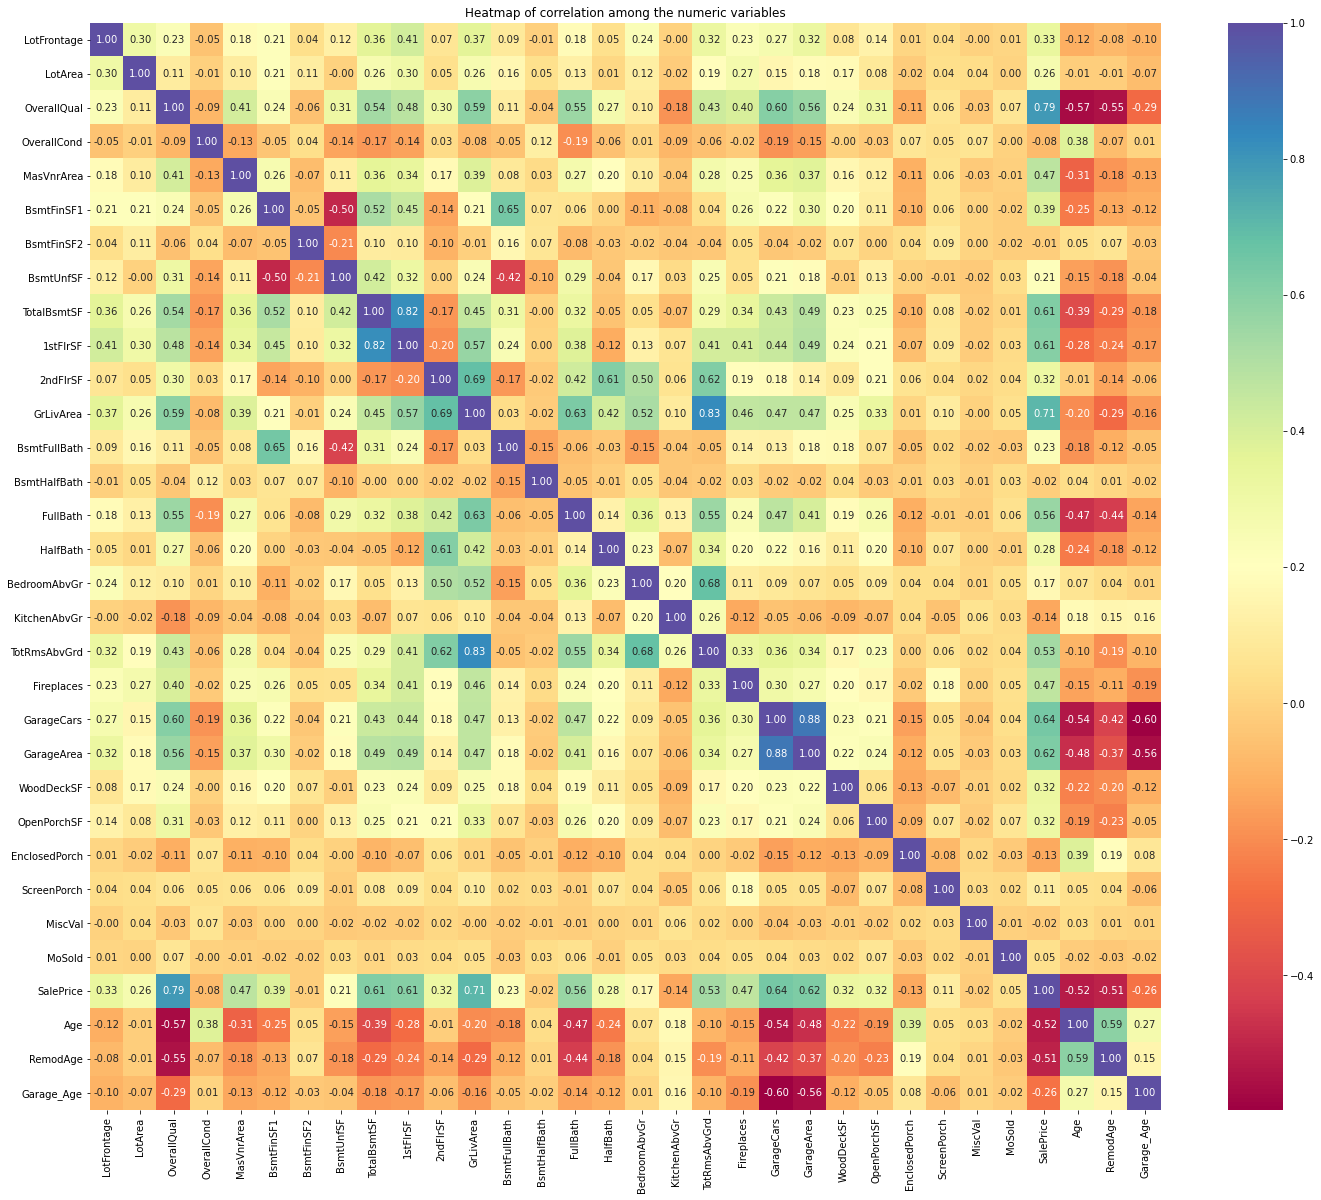

In [32]:
plt.figure(figsize=(24,20))
numvars = data.describe().columns
num_cor = data[numvars].corr()
sns.heatmap(num_cor,annot=True,cmap="Spectral",fmt='.2f')
plt.title("Heatmap of correlation among the numeric variables")
plt.show()

<b> Inferences</b>

- It is clear OverallQual and GrLivArea have a very strong positive linear relationship with SalePrice the target variable.
- RemodAge and Age have the strongest negative linear relationship. Older the house/remodelling, lesser it is sold for.

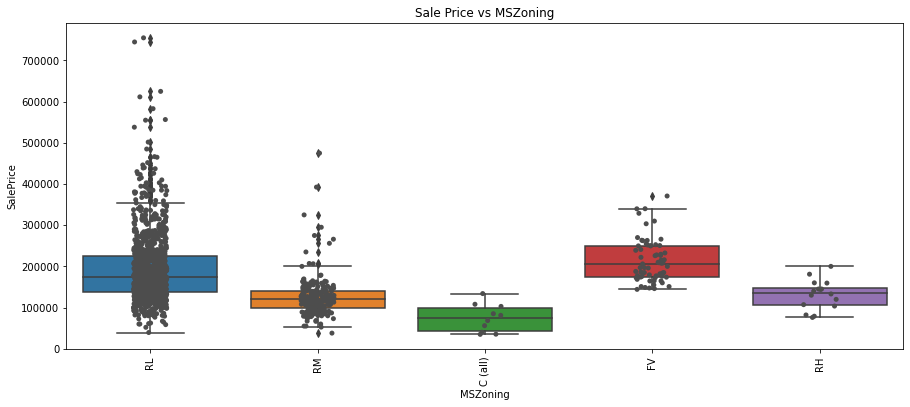

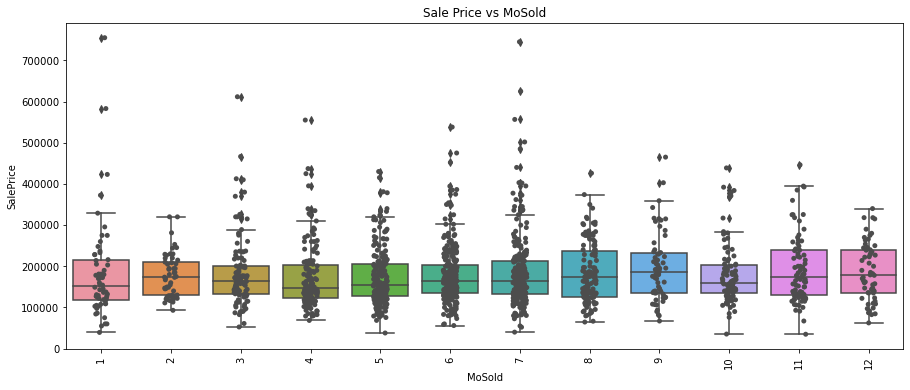

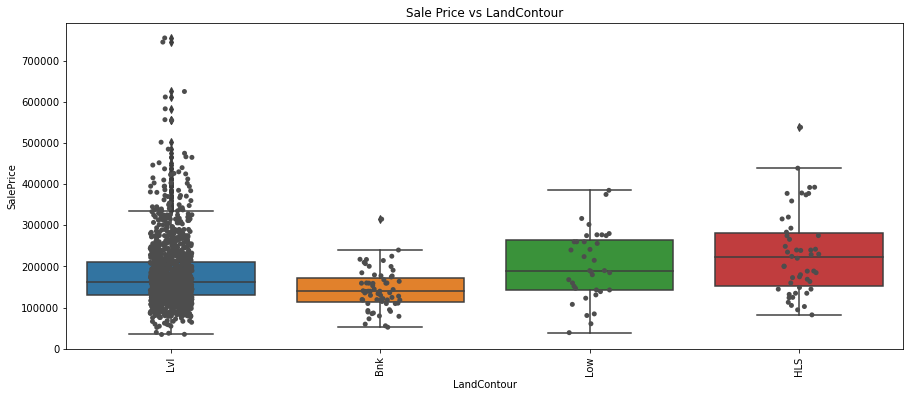

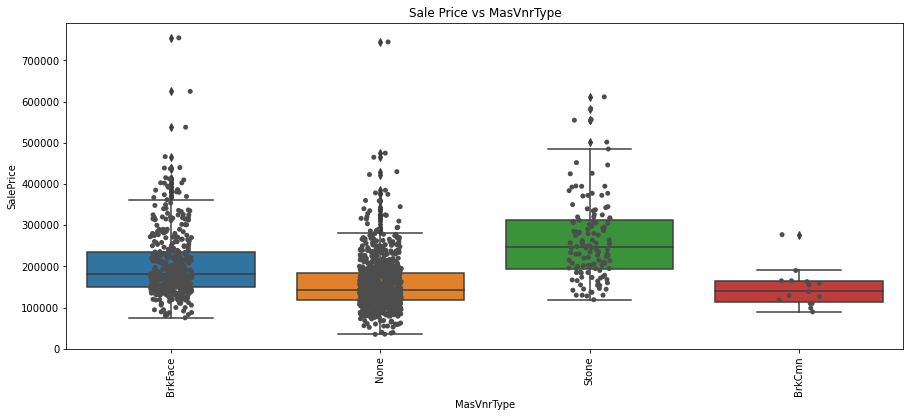

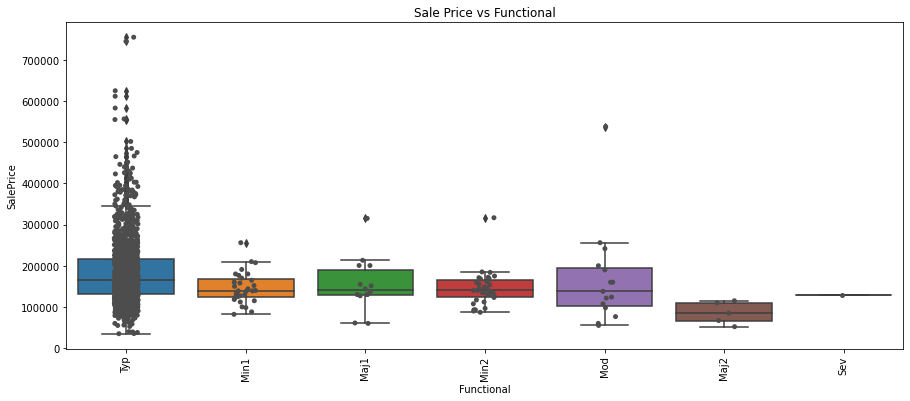

In [33]:
### Categorical Variable vs Target Variable
vars = ["MSZoning","MoSold","LandContour","MasVnrType","Functional"]

for i in vars:
    
    plt.figure(figsize=(15,6));
    sns.boxplot(data=data,y="SalePrice",x=i)
    sns.stripplot(data=data,y="SalePrice",x=i,color=".3");
    plt.title("Sale Price vs " + i)
    plt.xticks(rotation=90);
    plt.show()
    
 


<b> Inferences</b>

- We see highest sales have happened in the Residential Low desnity Zone
- The number of sales was highest in July. 
- While the highest number of sales happened in the Level Land Contour, the highest median of the Sales Price falls in the Hill Side categroy
- We see only one sale has happened for a Severely Damaged house(Functional). The highest median here is in the Typical functional property.


## Encoding ordinal variables

In [34]:
#The values in the below variables are ordered meaning they are ordinal variables, inorder to preserve this order, we will encode them

data['LotShape'] = data['LotShape'].map({'Reg':3,
       'IR1':2,
       'IR2':1,
       'IR3':0})
data['LandSlope'] = data['LandSlope'].map({'Gtl':2,
       'Mod':1,
       'Sev':0})
data['ExterQual'] = data['ExterQual'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1})
data['ExterCond'] = data['ExterCond'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1})
data['BsmtQual'] = data['BsmtQual'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'No Basement' : 0})
data['BsmtCond'] = data['BsmtCond'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'No Basement' : 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd':4,
       'Av':3,
       'Mn':2,
       'No':1,
       'No Basement':0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ':6,
       'ALQ':5,
       'BLQ':4,
       'Rec':3,
       'LwQ':2,
       'Unf':1,
      'No Basement':0})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ':6,
       'ALQ':5,
       'BLQ':4,
       'Rec':3,
       'LwQ':2,
       'Unf':1,
      'No Basement':0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1})
data['KitchenQual'] = data['KitchenQual'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1})
data['GarageFinish'] = data['GarageFinish'].map({'Fin':3,
       'RFn':2,
       'Unf':1,
      'No Garage':0})
data['GarageQual'] = data['GarageQual'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'No Garage' : 0})
data['GarageCond'] = data['GarageCond'].map({'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'No Garage' : 0})



#The below variables are binary. These can be encoded as well.
data['Street'] = data['Street'].map({'Grvl':0,
       'Pave':1})
data['CentralAir'] = data['CentralAir'].map({'N':0,'Y':1})


### Ordinal Variable vs Target Variable

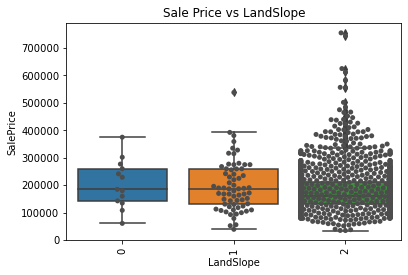

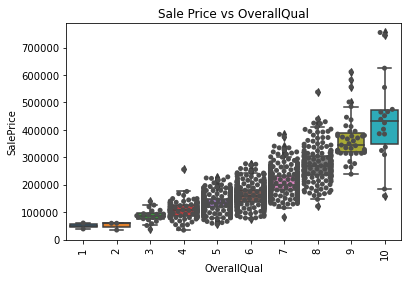

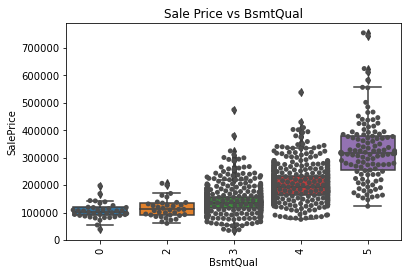

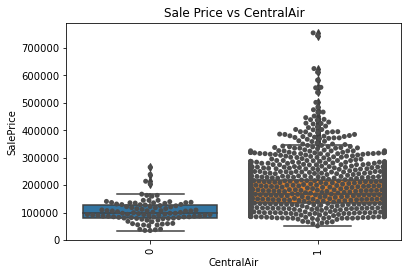

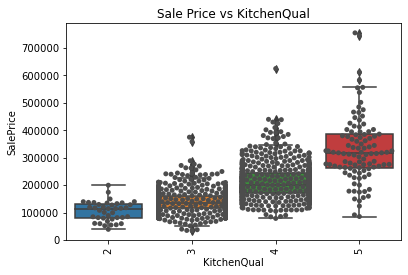

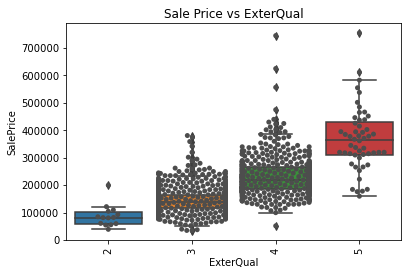

In [35]:
vars = ["LandSlope","OverallQual","BsmtQual","CentralAir","KitchenQual","ExterQual"]

for i in vars:
    plt.figure()
    sns.boxplot(data=data,y="SalePrice",x=i)
    sns.swarmplot(data=data,y="SalePrice",x=i,color="0.3")
    plt.title("Sale Price vs " + i)
    plt.xticks(rotation=90)
    plt.show()

The above variables are ordinal, and plotting them with their encoded values instead of their labels allows us to clearly visualize any existing linear relationship. The encoding here is done such that low values means poor conditions of the property and high values means good/excellent conditions. Eg : KitchenQual, 1 stands for Poor quality and 5 stands for Excellent quality

<b> Inferences</b>


- There seems to be not much impact on the median of Sales from the Land Slope. However, we see most of the sales have happened in the Gentle Slope category.
- The median of the Sales Price has a clear linear relationship with the Overall Quality of the property
- There is a linear relationship with the Basement Quality and Sales Price as well
- The median of Sales Price and number of sales is high in properties that have Central Air
- There is a linear relationship with the Kitchen Quality and Sales price
- While highest sales have happened in Good exterior material quality, there is a clear linear relationship of  this variable with the target variable, Sales price

#### Checking target variable for skewness

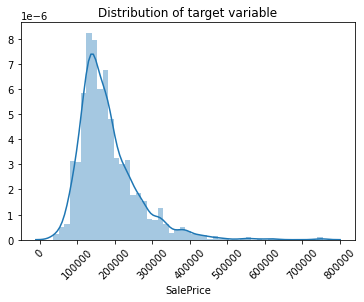

In [36]:
#Lets look at the spread of the target variable
sns.distplot(data['SalePrice']);
plt.title("Distribution of target variable")
plt.xticks(rotation=45)
plt.show()

We see the target variable is skewed. A normally distributed target variable is optimum for a linear regression model. We can use log transformation to achieve the same. We will apply this transformation after the dataset is split

## 3. Data Preperation

### Dummy variable creation for categorical variables

In [37]:
#looking at the categorical variables
cat_vars = data.select_dtypes(include='object').columns
cat_vars

Index(['MSSubClass', 'MSZoning', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Month_Sold'],
      dtype='object')

In [38]:
#create dummy variables using get_dummies method
dummy = pd.get_dummies(data[cat_vars],drop_first=True)

In [39]:
data = pd.concat([data,dummy],axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Month_Sold,Age,RemodAge,Garage_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Month_Sold_Aug,Month_Sold_Dec,Month_Sold_Feb,Month_Sold_Jan,Month_Sold_Jul,Month_Sold_Jun

In [40]:
#dropping the original columns
data = data.drop(cat_vars,axis=1)

In [41]:
#checking the dataset after the data procesisng steps
data.info(max_cols=220)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 220 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   LotFrontage                                                       1460 non-null   float64
 1   LotArea                                                           1460 non-null   int64  
 2   Street                                                            1460 non-null   int64  
 3   LotShape                                                          1460 non-null   int64  
 4   LandSlope                                                         1460 non-null   int64  
 5   OverallQual                                                       1460 non-null   int64  
 6   OverallCond                                                       1460 non-null   int64  
 7   MasVnrArea                      

## Splitting data into test and train data

In [42]:
y = data.pop("SalePrice")
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [43]:
X = data
X.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,Age,RemodAge,Garage_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Month_Sold_Aug,Month_Sold_Dec,Month_Sold_Feb,Month_Sold_Jan,Month_Sold_Jul,Month_Sold_Jun,Month_Sold_Mar,Month_Sold_May,Month_Sold_Nov,Month_Sold_Oct,Month_Sold_Sep
0,65.0,8450,1,3,2,7,5,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,1710,1,0,2,1,3,1,4,8,0,2,2,548,3,3,0,61,0,0,0,2,5,5,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,

In [44]:
#among the dataset, we allocate 70% of data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [45]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1021, 219) (438, 219) (1021,) (438,)


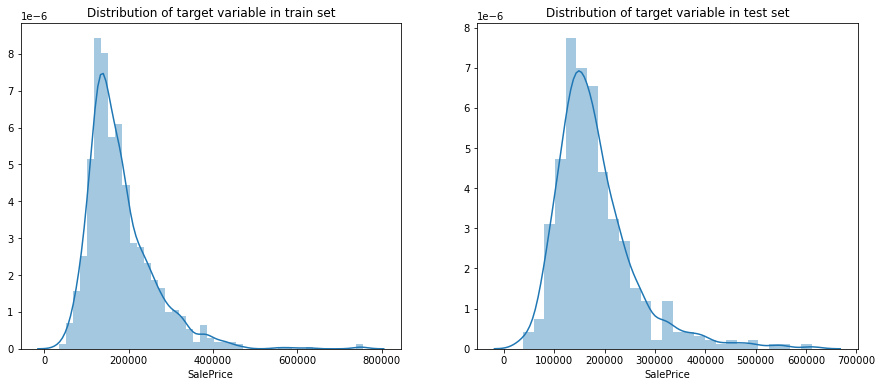

In [46]:
#checking the distribution of the train and test sets of dependent variable
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Distribution of target variable in train set")
sns.distplot(y_train)

plt.subplot(1,2,2)
sns.distplot(y_test)
plt.title("Distribution of target variable in test set")
plt.show()

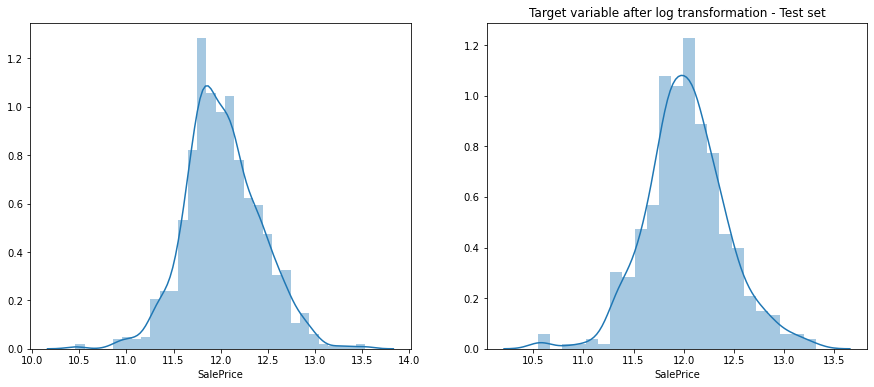

In [47]:
#applying log transformation to convert skewed distribution to normal distribution
y_train = np.log(y_train)
y_test = np.log(y_test)

#checking the distribution after log transformation
plt.figure(figsize=(15,6))
plt.title("Target variable after log transformation - Train set")
plt.subplot(1,2,1)
sns.distplot(y_train)

plt.subplot(1,2,2)
plt.title("Target variable after log transformation - Test set")
sns.distplot(y_test)
plt.show()

We see the distribution is almost normal now after applying log transformation

## Scaling the train and test data set

In [48]:
#selecting numerical variables to scale from the dataset.
numvars = ['LotFrontage','LotArea','Street','LotShape','LandSlope','OverallQual','OverallCond','MasVnrArea','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','MiscVal','MoSold','Age','RemodAge','Garage_Age']

scaler = MinMaxScaler()

X_train[numvars] = scaler.fit_transform(X_train[numvars])
X_test[numvars] = scaler.transform(X_test[numvars])

In [49]:
#scaling verification
X_train.describe()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,Age,RemodAge,Garage_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Month_Sold_Aug,Month_Sold_Dec,Month_Sold_Feb,Month_Sold_Jan,Month_Sold_Jul,Month_Sold_Jun,Month_Sold_Mar,Month_Sold_May,Month_Sold_Nov,Month_Sold_Oct,Month_Sold_Sep
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0

The min is 0 and max 1 for all the variables. Which means variables have all been scaled successfully.

## 4. Model Building

#### Checking how linear regression performs

In [50]:
#instantiate 
lm = LinearRegression()

#fit a line
lm.fit(X_train,y_train)



rfe = RFE(lm,45) #specifying the number of features. We pick 10 since we have already worked on this dataset and are aware of the number of features
rfe = rfe.fit(X_train,y_train)


print("--------------------")
print("Linear Regression with RFE")
print("--------------------")

#checking the metrics
y_train_pred = rfe.predict(X_train)
print("Train set")
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(mean_squared_error(y_train,y_train_pred))

print("--------------------")
y_test_pred = rfe.predict(X_test)
print("Test set")
print(r2_score(y_true=y_test,y_pred=y_test_pred))
print(mean_squared_error(y_test,y_test_pred))

--------------------
Linear Regression with RFE
--------------------
Train set
0.923383105593195
0.012043503605645475
--------------------
Test set
0.8392564809045173
0.02644875736309313


We see the r2 score for the test set is much lesser than for the train set. This is due to overfitting. Regularization can help reduce this problem. Ridge and Lasso are two regularization regression algorithms. Let's try these and check if the model improves

## Ridge regression

In [51]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_r = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_r.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
# Printing the best hyperparameter alpha
print(model_cv_r.best_params_)

{'alpha': 6.0}


In [53]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=6)

In [54]:
#Lets look at the metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("-------------------------------")
print("Ridge Regression with Alpha = 6")
print("-------------------------------")

print("Train set")
print(r2_score(y_true=y_train,y_pred=y_pred_train))
print(mean_squared_error(y_train,y_pred_train))

print("-------------------------------")
print("Test set")
print(r2_score(y_true=y_test,y_pred=y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print("-------------------------------")

-------------------------------
Ridge Regression with Alpha = 6
-------------------------------
Train set
0.9158502420981396
0.013227603657806782
-------------------------------
Test set
0.8850847689571186
0.018908165506638906
-------------------------------


The difference between  the scores for train and test set is much lesser than what we observed in the simple linear regression model

In [55]:
#saving results of cross validation into a dataframe
cv_results_r = pd.DataFrame(model_cv_r.cv_results_)
cv_results_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013394,0.005385,0.005995,0.002280,0.0001,{'alpha': 0.0001},0.887591,0.694354,0.808568,0.611130,0.912544,0.782837,0.114692,26,0.962110,0.960247,0.960588,0.960016,0.958288,0.960250,0.001223
1,0.012594,0.003607,0.006595,0.002060,0.001,{'alpha': 0.001},0.887942,0.694585,0.809856,0.621571,0.913083,0.785408,0.111806,25,0.962099,0.960247,0.960578,0.960008,0.958276,0.960242,0.001223
2,0.009996,0.001998,0.003996,0.000002,0.01,{'alpha': 0.01},0.889582,0.696388,0.818701,0.699867,0.916186,0.804145,0.092250,23,0.961357,0.960225,0.959887,0.959434,0.957461,0.959673,0.001276
3,0.008396,0.000490,0.003996,0.000633,0.05,{'alpha': 0.05},0.887499,0.702818,0.830151,0.824825,0.915913,0.832241,0.073300,21,0.956079,0.959985,0.955007,0.954754,0.951730,0.955511,0.002663
4,0.009196,0.000982,0.003795,0.000401,0.1,{'alpha': 0.1},0.884919,0.710043,0.833483,0.861780,0.913013,0.840647,0.070359,20,0.951752,0.959510,0.951062,0.950392,0.947040,0.951951,0.004111
5,0.008394,0.000488,0.003995,0.000003,0.2,{'alpha': 0.2},0.883326,0.722277,0.836545,0.880715,0.909311,0.846435,0.066336,19,0.947089,0.958342,0.946931,0.945362,0.942017,0.947948,0.005508
6,0.008795,0.000748,0.005396,0.001743,0.3,{'alpha': 0.3},0.883382,0.732069,0.838625,0.886632,0.907056,0.849553,0.062845,18,0.944337,0.957108,0.944603,0.942327,0.939116,0.945498,0.006127
7,0.011390,0.002722,0.005594,0.001625,0.4,{'alpha': 0.4},0.883896,0.740035,0.840237,0.889563,0.905494,0.851845,0.059940,17,0.942334,0.955902,0.942974,0.940126,0.937063,0.943680,0.006451
8,0.011793,0.003428,0.006196,0.002225,0.5,{'alpha': 0.5},0.884534,0.746635,0.841523,0.891348,0.904338,0.853676,0.057521,16,0.940725,0.954756,0.941702,0.938374,0.935455,0.942202,0.006636
9,0.010395,0.002868,0.005195,0.001600,0.6,{'alpha': 0.6},0.885184,0.752196,0.842568,0.892562,0.903447,0.855192,0.055484,15,0.939362,0.953678,0.940645,0.936906,0.934119,0.940942,0.006747


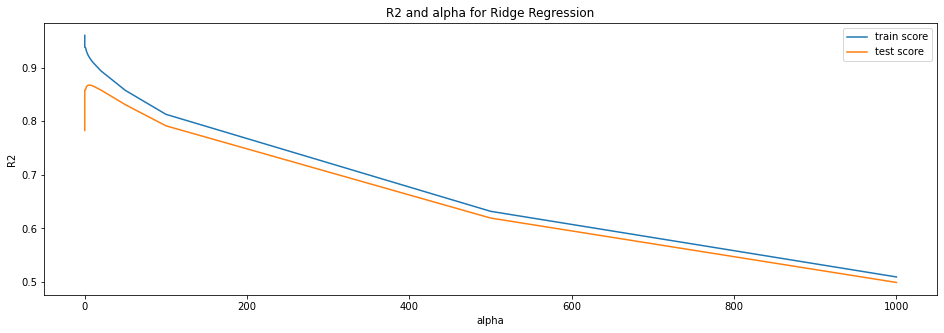

In [56]:
# plotting mean test and train scoes with alpha 
cv_results_r['param_alpha'] = cv_results_r['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_train_score'])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha for Ridge Regression")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
#checking the coefficients obtained from the ridge model
ridge_coef = pd.DataFrame(list(zip(X_train.columns,abs(ridge.coef_),ridge.coef_))).sort_values(by=1,ascending=False)
ridge_coef.reset_index(drop=True,inplace=True)
ridge_coef.columns = ["Variable","Abs-Coef","Coefficient-Ridge"]
ridge_coef

,Variable,Abs-Coef,Coefficient-Ridge
0,OverallQual,0.310291,0.310291
1,GrLivArea,0.228902,0.228902
2,1stFlrSF,0.192446,0.192446
3,TotRmsAbvGrd,0.175976,0.175976
4,2ndFlrSF,0.164694,0.164694
5,FullBath,0.160082,0.160082
6,OverallCond,0.153601,0.153601
7,GarageCars,0.144020,0.144020
8,Fireplaces,0.130498,0.130498
9,Neighborhood_NridgHt,0.116220,0.116220


### Lasso Regression

In [58]:
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
# Printing the best hyperparameter alpha
print(model_cv_l.best_params_)

{'alpha': 0.001}


In [60]:
#Fitting Lasso model for best value of alpha and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 


Lasso(alpha=0.001)

In [61]:
#Lets look at the metrics
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("-----------------------------------")
print("Lasso Regression with Alpha = 0.001")
print("-----------------------------------")

print("Train set")
print(r2_score(y_true=y_train,y_pred=y_pred_train))
print(mean_squared_error(y_train,y_pred_train))

print("-----------------------------------")
y_test_pred = lm.predict(X_test)
print("Test set")
print(r2_score(y_true=y_test,y_pred=y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print("-----------------------------------")

-----------------------------------
Lasso Regression with Alpha = 0.001
-----------------------------------
Train set
0.9018693651572212
0.015425274852282674
-----------------------------------
Test set
0.8858389023766475
0.018784080305911947
-----------------------------------


In [62]:
#saving cross validation results in a dataframe
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)
cv_results_l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.151511,0.037136,0.004799,1.166991e-03,0.0001,{'alpha': 0.0001},0.899072,0.709061,0.845459,0.838731,0.929655,0.844396,0.075640,2,0.950674,0.956457,0.950044,0.951199,0.945408,0.950757,0.003516
1,0.015788,0.000748,0.005598,1.019534e-03,0.001,{'alpha': 0.001},0.899789,0.804710,0.850221,0.908565,0.905814,0.873820,0.040591,1,0.902899,0.924245,0.912129,0.902255,0.896824,0.907670,0.009637
2,0.010590,0.000490,0.004199,3.995220e-04,0.01,{'alpha': 0.01},0.817965,0.754882,0.750770,0.803406,0.762620,0.777929,0.027405,3,0.781431,0.793874,0.791603,0.784539,0.782471,0.786784,0.005016
3,0.011395,0.003198,0.005395,1.354583e-03,0.05,{'alpha': 0.05},0.317218,0.302313,0.315671,0.319565,0.286147,0.308183,0.012549,4,0.308364,0.326001,0.322397,0.315869,0.315526,0.317631,0.006102
4,0.008595,0.000487,0.004796,1.600027e-03,0.1,{'alpha': 0.1},0.030407,0.015060,0.026359,0.029740,0.015022,0.023318,0.006896,5,0.041093,0.023519,0.025654,0.036150,0.026531,0.030589,0.006813
5,0.009797,0.001164,0.003394,4.889141e-04,0.2,{'alpha': 0.2},-0.010402,-0.009314,-0.000115,-0.009225,-0.009184,-0.007648,0.003794,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.009596,0.001625,0.005194,1.599754e-03,0.3,{'alpha': 0.3},-0.010402,-0.009314,-0.000115,-0.009225,-0.009184,-0.007648,0.003794,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.009791,0.002219,0.005000,1.557396e-03,0.4,{'alpha': 0.4},-0.010402,-0.009314,-0.000115,-0.009225,-0.009184,-0.007648,0.003794,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.011394,0.002575,0.005196,1.469108e-03,0.5,{'alpha': 0.5},-0.010402,-0.009314,-0.000115,-0.009225,-0.009184,-0.007648,0.003794,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.009193,0.001461,0.003796,3.997088e-04,0.6,{'alpha': 0.6},-0.010402,-0.009314,-0.000115,-0.009225,-0.009184,-0.007648,0.003794,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


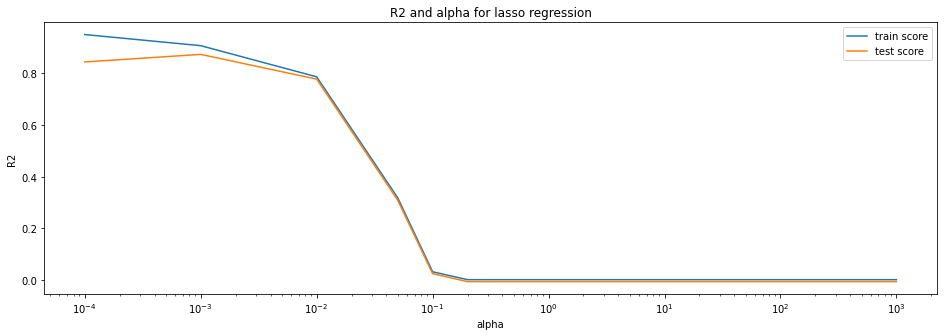

In [63]:
# plotting mean test and train scoes with alpha 
cv_results_l['param_alpha'] = cv_results_l['param_alpha'].astype('float32')
plt.figure(figsize=(16,5))

# plotting. We will plot x-axis in log scale for better visualization
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.xscale('log')
plt.title("R2 and alpha for lasso regression")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()



In [64]:
#checking the coefficients obtained from the lasso model
lasso_coef = pd.DataFrame(list(zip(X_train.columns,abs(lasso.coef_),lasso.coef_))).sort_values(by=1,ascending=False)
lasso_coef.reset_index(drop=True,inplace=True)
lasso_coef.columns = ["Variable","Abs-Coeff","Coefficient-Lasso"]
lasso_coef

,Variable,Abs-Coeff,Coefficient-Lasso
0,GrLivArea,0.845368,0.845368
1,OverallQual,0.565426,0.565426
2,GarageCars,0.213269,0.213269
3,OverallCond,0.166635,0.166635
4,TotRmsAbvGrd,0.142154,0.142154
5,FullBath,0.127245,0.127245
6,Neighborhood_Somerst,0.118223,0.118223
7,Fireplaces,0.116570,0.116570
8,Neighborhood_NridgHt,0.114597,0.114597
9,BsmtFullBath,0.107113,0.107113


## Conclusion

We see the difference between the train and test set is quite less in both lasso and ridge regression. Which means the model has generalized well and the problem of overfitting is addressed by regularization. 

Since Lasso offers the advantage of feature elimination, we choose lasso as the final model.

As per the model obtained by Lasso method of hyperparameter tuning (with alpha  = 0.001), the topmost variables that impact the Sale Price are :

1. GrLivArea
- OverallQual
- GarageCars
- OverallCond
- TotRmsAbvGrd
- FullBath
- Neighborhood_Somerst
- Fireplaces
- Neighborhood_NridgHt
- BsmtFullBath

We can hence conclude, Living area above the ground, Overall quality and condition of the property, garage size and the number of rooms above the ground are the most important factors in deciding the Sale Price of a property. Apart from this, the number of bathrooms and the neighborhood the property is located in are also important factors to consider

## For Subjective questions 

In [65]:
#subjective question -1 Doubling alpha
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6 * 2
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train, y_train)

#Lets look at the metrics
y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

print("--------------------------------")
print("Ridge Regression with Alpha = 12")
print("--------------------------------")

print("Train set")
print(r2_score(y_true=y_train,y_pred=y_pred_train))
print(mean_squared_error(y_train,y_pred_train))

print("--------------------------------")
print("Test set")
print(r2_score(y_true=y_test,y_pred=y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print("--------------------------------")

--------------------------------
Ridge Regression with Alpha = 12
--------------------------------
Train set
0.9057942883581374
0.014808311360247454
--------------------------------
Test set
0.8784066165249778
0.020006989486015175
--------------------------------


In [66]:
ridge_2_coef = pd.DataFrame(list(zip(X_train.columns,abs(ridge_double.coef_),ridge_double.coef_))).sort_values(by=1,ascending=False)
ridge_2_coef.reset_index(drop=True,inplace=True)
ridge_2_coef.columns = ["Variable","Abs-Coef","Coefficient-Ridge"]
ridge_2_coef

,Variable,Abs-Coef,Coefficient-Ridge
0,OverallQual,0.251879,0.251879
1,GrLivArea,0.181537,0.181537
2,TotRmsAbvGrd,0.163342,0.163342
3,FullBath,0.150880,0.150880
4,1stFlrSF,0.149876,0.149876
5,Fireplaces,0.138611,0.138611
6,2ndFlrSF,0.137722,0.137722
7,GarageCars,0.130917,0.130917
8,OverallCond,0.117034,0.117034
9,GarageArea,0.109030,0.109030


In [67]:
#Subjective question 1. Doubling alpha.
#Fitting Lasso model for best value of alpha and printing coefficients which have been penalised

alpha =0.001 * 2

lasso_double = Lasso(alpha=alpha)
lasso_double.fit(X_train, y_train) 


#Lets look at the metrics
y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

print("-----------------------------------")
print("Lasso Regression with Alpha = 0.002")
print("-----------------------------------")

print("Train set")
print(r2_score(y_true=y_train,y_pred=y_pred_train))
print(mean_squared_error(y_train,y_pred_train))

print("-----------------------------------")
print("Test set")
print(r2_score(y_true=y_test,y_pred=y_pred_test))
print(mean_squared_error(y_test,y_pred_test))

print("-----------------------------------")

-----------------------------------
Lasso Regression with Alpha = 0.002
-----------------------------------
Train set
0.8863356511247893
0.01786703841379349
-----------------------------------
Test set
0.8717131596797805
0.021108331655299146
-----------------------------------


In [68]:
lasso_2_coef = pd.DataFrame(list(zip(X_train.columns,abs(lasso_double.coef_),lasso_double.coef_))).sort_values(by=1,ascending=False)
lasso_2_coef.reset_index(drop=True,inplace=True)
lasso_2_coef.columns = ["Variable","Abs-Coeff","Coefficient-Lasso"]
lasso_2_coef

,Variable,Abs-Coeff,Coefficient-Lasso
0,GrLivArea,0.720594,0.720594
1,OverallQual,0.604613,0.604613
2,GarageCars,0.217953,0.217953
3,TotRmsAbvGrd,0.156520,0.156520
4,Fireplaces,0.138751,0.138751
5,FullBath,0.108105,0.108105
6,KitchenQual,0.100276,0.100276
7,OverallCond,0.086707,0.086707
8,RemodAge,0.085779,-0.085779
9,BsmtExposure,0.082283,0.082283


In [69]:
#Subjective question 2.
print("Feature elimination by lasso - ",lasso_coef.shape,lasso_coef[lasso_coef["Abs-Coeff"] != 0].shape)
lasso_coef[lasso_coef["Abs-Coeff"] != 0]

Feature elimination by lasso -  (219, 3) (65, 3)


,Variable,Abs-Coeff,Coefficient-Lasso
0,GrLivArea,0.845368,0.845368
1,OverallQual,0.565426,0.565426
2,GarageCars,0.213269,0.213269
3,OverallCond,0.166635,0.166635
4,TotRmsAbvGrd,0.142154,0.142154
5,FullBath,0.127245,0.127245
6,Neighborhood_Somerst,0.118223,0.118223
7,Fireplaces,0.116570,0.116570
8,Neighborhood_NridgHt,0.114597,0.114597
9,BsmtFullBath,0.107113,0.107113


Subjective question 3. Model(Lasso) excluding the five most important predictor variables. 

The top 5 variables in the final model are -

1. GrLivArea
- OverallQual
- GarageCars
- OverallCond
- TotRmsAbvGrd



In [70]:
X_train.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,Age,RemodAge,Garage_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Month_Sold_Aug,Month_Sold_Dec,Month_Sold_Feb,Month_Sold_Jan,Month_Sold_Jul,Month_Sold_Jun,Month_Sold_Mar,Month_Sold_May,Month_Sold_Nov,Month_Sold_Oct,Month_Sold_Sep
210,0.157534,0.019306,1.0,1.0,1.0,0.444444,0.625,0.00,0.333333,0.333333,0.6,0.75,0.25,0.500000,0.082920,0.166667,0.0,0.169521,0.141408,0.50,0.0,0.113889,0.000000,0.081860,0.333333,0.0,0.333333

In [71]:
X_test.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,Age,RemodAge,Garage_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Month_Sold_Aug,Month_Sold_Dec,Month_Sold_Feb,Month_Sold_Jan,Month_Sold_Jul,Month_Sold_Jun,Month_Sold_Mar,Month_Sold_May,Month_Sold_Nov,Month_Sold_Oct,Month_Sold_Sep
1436,0.133562,0.035192,1.0,1.000000,1.0,0.333333,0.625,0.00000,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.109142,0.166667,0.0,0.106164,0.141408,0.50,1.0,0.113889,0.000000,0.081860,0.000000,0.0

In [72]:
#dropping the top 5 variables from the X data sets.
X_train = X_train.drop(['GrLivArea','OverallQual','GarageCars','OverallCond','TotRmsAbvGrd'],axis=1)
X_train.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,Age,RemodAge,Garage_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Month_Sold_Aug,Month_Sold_Dec,Month_Sold_Feb,Month_Sold_Jan,Month_Sold_Jul,Month_Sold_Jun,Month_Sold_Mar,Month_Sold_May,Month_Sold_Nov,Month_Sold_Oct,Month_Sold_Sep
210,0.157534,0.019306,1.0,1.0,1.0,0.00,0.333333,0.333333,0.6,0.75,0.25,0.500000,0.082920,0.166667,0.0,0.169521,0.141408,0.50,0.0,0.113889,0.000000,0.333333,0.0,0.333333,0.0,0.250,0.0,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.173

In [73]:
X_test = X_test.drop(['GrLivArea','OverallQual','GarageCars','OverallCond','TotRmsAbvGrd'],axis=1)
X_test.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,Age,RemodAge,Garage_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Month_Sold_Aug,Month_Sold_Dec,Month_Sold_Feb,Month_Sold_Jan,Month_Sold_Jul,Month_Sold_Jun,Month_Sold_Mar,Month_Sold_May,Month_Sold_Nov,Month_Sold_Oct,Month_Sold_Sep
1436,0.133562,0.035192,1.0,1.000000,1.0,0.00000,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.109142,0.166667,0.0,0.106164,0.141408,0.50,1.0,0.113889,0.000000,0.000000,0.0,0.333333,0.0,0.375,0.0,0.333333,0.000000,0.333333,0.372355,0.6,0.6,0.000000,0.000

In [74]:
lasso_1 = Lasso()

# cross validation
model_cv_l1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.001),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [75]:
# Printing the best hyperparameter alpha
print(model_cv_l1.best_params_)

{'alpha': 0.001}


In [76]:
#Fitting Lasso model for best value of alpha and printing coefficients which have been penalised

alpha =0.001

lasso_1 = Lasso(alpha=alpha)
lasso_1.fit(X_train, y_train) 


Lasso(alpha=0.001)

In [77]:
#Lets look at the metrics
y_pred_train = lasso_1.predict(X_train)
y_pred_test = lasso_1.predict(X_test)

print("-----------------------------------")
print("Lasso Regression with Alpha = 0.001")
print("-----------------------------------")

print("Train set")
print(r2_score(y_true=y_train,y_pred=y_pred_train))
print(mean_squared_error(y_train,y_pred_train))

print("-----------------------------------")
print("Test set")
print(r2_score(y_true=y_test,y_pred=y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print("-----------------------------------")

-----------------------------------
Lasso Regression with Alpha = 0.001
-----------------------------------
Train set
0.8882021560988266
0.017573640207577804
-----------------------------------
Test set
0.8618855148801524
0.022725373475825844
-----------------------------------


In [78]:
#looking at the coefficients and the top variables
lasso_coef_l1 = pd.DataFrame(list(zip(X_train.columns,abs(lasso_1.coef_),lasso_1.coef_))).sort_values(by=1,ascending=False)
lasso_coef_l1.reset_index(drop=True,inplace=True)
lasso_coef_l1.columns = ["Variable","Abs-Coeff","Coefficient-Lasso"]
lasso_coef_l1

,Variable,Abs-Coeff,Coefficient-Lasso
0,1stFlrSF,0.881585,0.881585
1,2ndFlrSF,0.419176,0.419176
2,GarageArea,0.233226,0.233226
3,FullBath,0.168188,0.168188
4,BsmtQual,0.166543,0.166543
5,Fireplaces,0.162833,0.162833
6,Neighborhood_NridgHt,0.138293,0.138293
7,KitchenQual,0.136843,0.136843
8,Neighborhood_MeadowV,0.119785,-0.119785
9,Neighborhood_Somerst,0.113044,0.113044
